In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="darkgrid")
from matplotlib import pyplot as plt

import lightgbm as lgb
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, log_loss, precision_recall_curve, auc
from sklearn.model_selection import GridSearchCV

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
split_path = '/content/drive/MyDrive/Colab Notebooks/data/207_project/'
x_train = pd.read_csv(split_path + 'hotel_bookings_X_train.csv')
y_train = pd.read_csv(split_path + 'hotel_bookings_Y_train.csv')
x_val = pd.read_csv(split_path + 'hotel_bookings_X_val.csv')
y_val = pd.read_csv(split_path + 'hotel_bookings_Y_val.csv')
x_test = pd.read_csv(split_path + 'hotel_bookings_X_test.csv')
y_test = pd.read_csv(split_path + 'hotel_bookings_Y_test.csv')

## Initialize Model

In [4]:
lgbm = lgb.LGBMClassifier(objective="binary", metric="auc", random_state=42)

## GridSearchCV

### GS #1

In [5]:
param_grid = {
    "num_leaves": [16, 32, 48],
    "max_depth": [-1, 3, 5],
    "colsample_bytree": [0.8, 1.0]
}

In [6]:
grid = GridSearchCV(lgbm, param_grid, cv=5, scoring="f1", n_jobs=-1,
    verbose=1)

In [7]:
grid.fit(
    x_train,
    y_train,
    eval_set=[(x_val, y_val)]
    )

print("Best Parameters:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 26533, number of negative: 45099
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019919 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 834
[LightGBM] [Info] Number of data points in the train set: 71632, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.370407 -> initscore=-0.530471
[LightGBM] [Info] Start training from score -0.530471
Best Parameters: {'colsample_bytree': 1.0, 'max_depth': -1, 'num_leaves': 48}
Best Accuracy: 0.7729105369096986


### GS #2 (Fine-tune from #1)

In [8]:
param_grid2 = {
    "num_leaves": [50, 75, 100],
    "max_depth": [16, 24],
    "colsample_bytree": [1.0],
    "learning_rate": [0.5, 0.1, 0.01],
    "n_estimators": [100, 200],
}

In [9]:
grid2 = GridSearchCV(lgbm, param_grid2, cv=5, scoring="f1", n_jobs=-1,
    verbose=1)

grid2.fit(
    x_train,
    y_train,
    eval_set=[(x_val, y_val)]
    )

print("Best Parameters:", grid2.best_params_)
print("Best Accuracy:", grid2.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 26533, number of negative: 45099
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023428 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 834
[LightGBM] [Info] Number of data points in the train set: 71632, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.370407 -> initscore=-0.530471
[LightGBM] [Info] Start training from score -0.530471
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.5, 'max_depth': 16, 'n_estimators': 200, 'num_leaves': 100}
Best Accuracy: 0.7935412909247873


### GS #3 (Fine-tune from #2)

In [10]:
param_grid3 = {
    "num_leaves": [100, 200],
    "max_depth": [8, 16],
    "colsample_bytree": [1.0],
    "learning_rate": [0.5, 0.1, 0.01],
    "n_estimators": [200]
}

In [11]:
grid3 = GridSearchCV(lgbm, param_grid3, cv=5, scoring="f1", n_jobs=-1,
    verbose=1)

grid3.fit(
    x_train,
    y_train,
    eval_set=[(x_val, y_val)]
    )

print("Best Parameters:", grid3.best_params_)
print("Best Accuracy:", grid3.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 26533, number of negative: 45099
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019986 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 834
[LightGBM] [Info] Number of data points in the train set: 71632, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.370407 -> initscore=-0.530471
[LightGBM] [Info] Start training from score -0.530471
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 16, 'n_estimators': 200, 'num_leaves': 200}
Best Accuracy: 0.798138904360748


## Predictions/Loss

In [12]:
# Predictions
train_y_pred = grid3.predict(x_train)
val_y_pred = grid3.predict(x_val)
y_pred = grid3.predict(x_test)

# Log Loss
train_prob = grid3.predict_proba(x_train)[:, 1]
val_prob = grid3.predict_proba(x_val)[:, 1]
y_prob = grid3.predict_proba(x_test)[:, 1]

train_y_loss = log_loss(y_train, train_prob)
val_y_loss = log_loss(y_val, val_prob)
y_loss = log_loss(y_test, y_prob)

## PR and ROC AUC Curves

In [13]:
# Precision-Recall AUC Curves
precision_train, recall_train, _ = precision_recall_curve(y_train, train_prob)
pr_auc_train = auc(recall_train, precision_train)

precision_val, recall_val, _ = precision_recall_curve(y_val, val_prob)
pr_auc_val = auc(recall_val, precision_val)

precision_test, recall_test, _ = precision_recall_curve(y_test, y_prob)
pr_auc_test = auc(recall_test, precision_test)

# ROC AUC Curves
fpr_train, tpr_train, _ = roc_curve(y_train, train_prob)
roc_auc_train = roc_auc_score(y_train, train_prob)

fpr_val, tpr_val, _ = roc_curve(y_val, val_prob)
roc_auc_val = roc_auc_score(y_val, val_prob)

fpr_test, tpr_test, _ = roc_curve(y_test, y_prob)
roc_auc_test = roc_auc_score(y_test, y_prob)

## Train Results

Train Accuracy: 0.923

Train Log Loss: 0.199



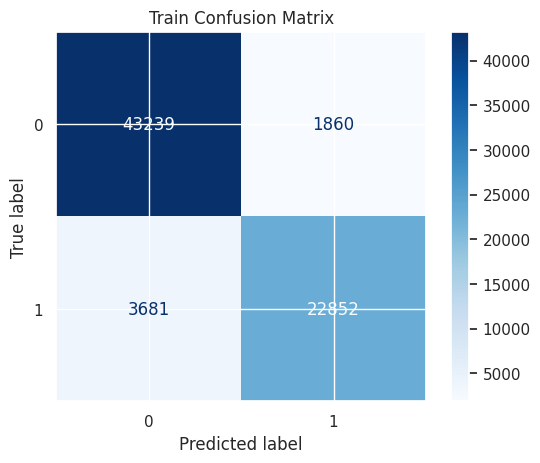


Val Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94     45099
           1       0.92      0.86      0.89     26533

    accuracy                           0.92     71632
   macro avg       0.92      0.91      0.92     71632
weighted avg       0.92      0.92      0.92     71632



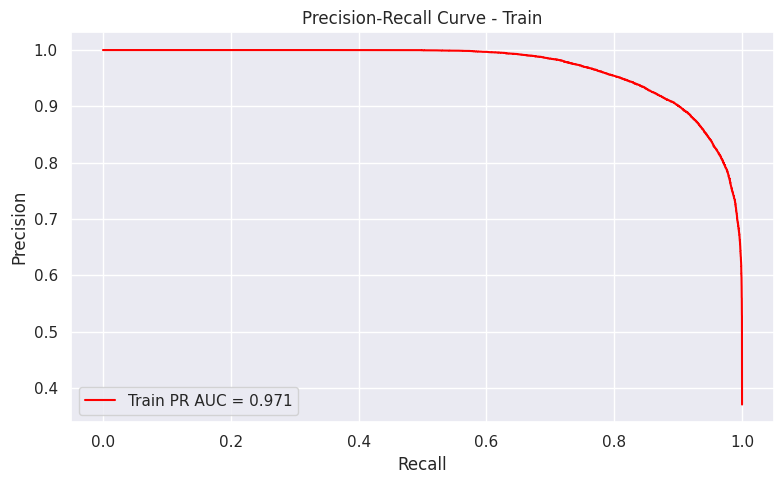

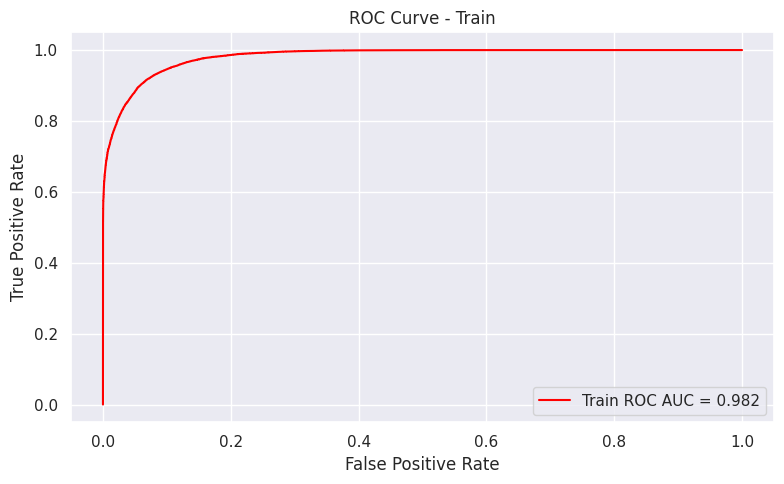

In [14]:
# Accuracy
print(f"Train Accuracy: {accuracy_score(y_train, train_y_pred):.3f}\n")

# Log Loss
print(f"Train Log Loss: {train_y_loss:.3f}\n")

# Confusion Matrix
train_conf_matrix = confusion_matrix(y_train, train_y_pred)
train_c_matrix = ConfusionMatrixDisplay(train_conf_matrix)
train_c_matrix.plot(cmap=plt.cm.Blues)
plt.title('Train Confusion Matrix')
plt.show()

# Classification Report
print('\nVal Classification Report:\n', classification_report(y_train, train_y_pred))

# PR AUC curve (precision-recall/average precision)
plt.figure(figsize=(8, 5))
plt.plot(recall_train, precision_train, color='red', label=f"Train PR AUC = {pr_auc_train:.3f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - Train")
plt.legend()
plt.tight_layout()
plt.show()

# ROC AUC curve
plt.figure(figsize=(8, 5))
plt.plot(fpr_train, tpr_train, color='red', label=f"Train ROC AUC = {roc_auc_train:.3f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Train")
plt.legend()
plt.tight_layout()
plt.show()

## Validation Results

Val Accuracy: 0.860

Val Log Loss: 0.315

Val Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.92      0.89     15033
           1       0.85      0.76      0.80      8845

    accuracy                           0.86     23878
   macro avg       0.86      0.84      0.85     23878
weighted avg       0.86      0.86      0.86     23878



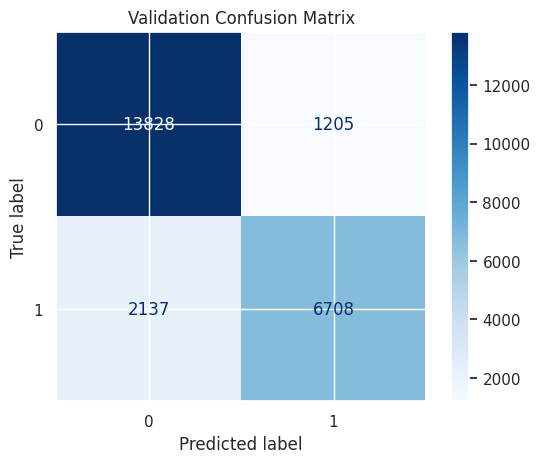


Val Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.92      0.89     15033
           1       0.85      0.76      0.80      8845

    accuracy                           0.86     23878
   macro avg       0.86      0.84      0.85     23878
weighted avg       0.86      0.86      0.86     23878



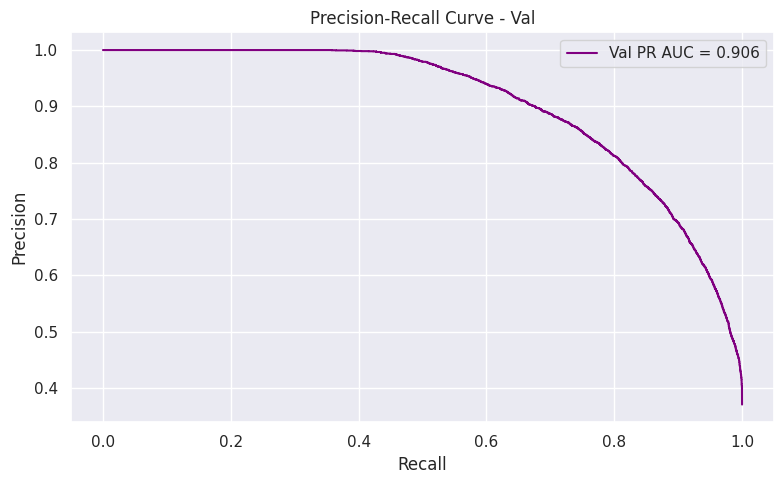

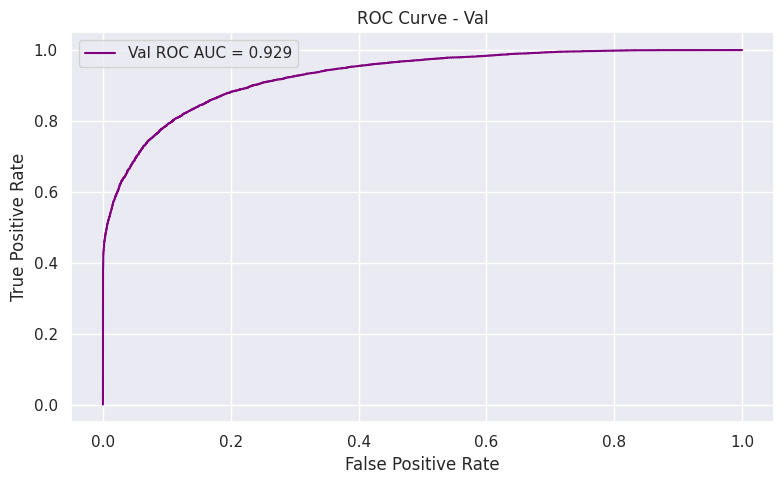

In [15]:
# Accuracy
print(f"Val Accuracy: {accuracy_score(y_val, val_y_pred):.3f}\n")

# Log Loss
print(f"Val Log Loss: {val_y_loss:.3f}\n")

# Classification Report
print('Val Classification Report:\n', classification_report(y_val, val_y_pred))

# Confusion Matrix
val_conf_matrix = confusion_matrix(y_val, val_y_pred)
val_c_matrix = ConfusionMatrixDisplay(val_conf_matrix)
val_c_matrix.plot(cmap=plt.cm.Blues)
plt.title('Validation Confusion Matrix')
plt.show()

# Classification Report
print('\nVal Classification Report:\n', classification_report(y_val, val_y_pred))

# PR AUC curve (precision-recall/average precision)
plt.figure(figsize=(8, 5))
plt.plot(recall_val, precision_val, color='purple', label=f"Val PR AUC = {pr_auc_val:.3f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - Val")
plt.legend()
plt.tight_layout()
plt.show()

# ROC AUC curve
plt.figure(figsize=(8, 5))
plt.plot(fpr_val, tpr_val, color='purple', label=f"Val ROC AUC = {roc_auc_val:.3f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Val")
plt.legend()
plt.tight_layout()
plt.show()

## Test Results

Test Accuracy: 0.859

Test Log Loss: 0.318



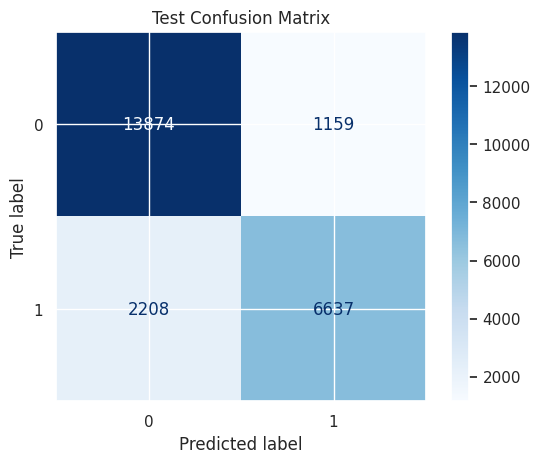

Test Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.92      0.89     15033
           1       0.85      0.75      0.80      8845

    accuracy                           0.86     23878
   macro avg       0.86      0.84      0.84     23878
weighted avg       0.86      0.86      0.86     23878



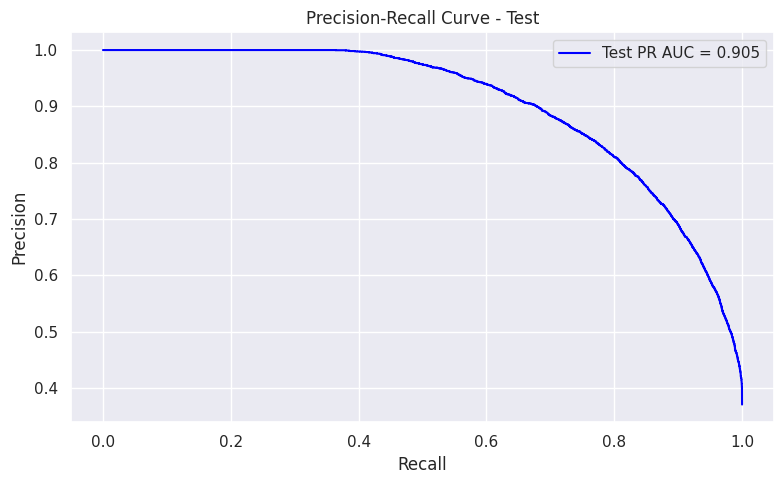

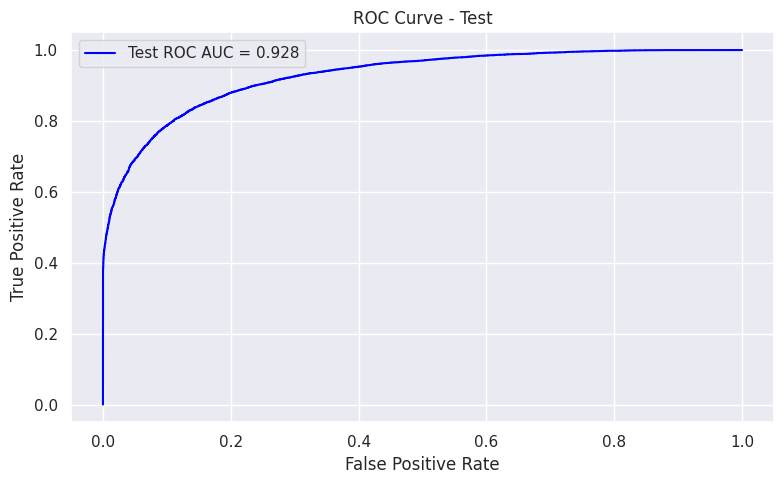

In [16]:
# Accuracy
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.3f}\n")

# Log Loss
print(f"Test Log Loss: {y_loss:.3f}\n")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
c_matrix = ConfusionMatrixDisplay(conf_matrix)
c_matrix.plot(cmap=plt.cm.Blues)
plt.title('Test Confusion Matrix')
plt.show()

# Classification Report
print('Test Classification Report:\n', classification_report(y_test, y_pred))

# PR AUC curve (precision-recall/average precision)
plt.figure(figsize=(8, 5))
plt.plot(recall_test, precision_test, color='blue', label=f"Test PR AUC = {pr_auc_test:.3f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - Test")
plt.legend()
plt.tight_layout()
plt.show()

# ROC AUC curve
plt.figure(figsize=(8, 5))
plt.plot(fpr_test, tpr_test, color='blue', label=f"Test ROC AUC = {roc_auc_test:.3f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Test")
plt.legend()
plt.tight_layout()
plt.show()

# ROC and PR AUC Comparisons

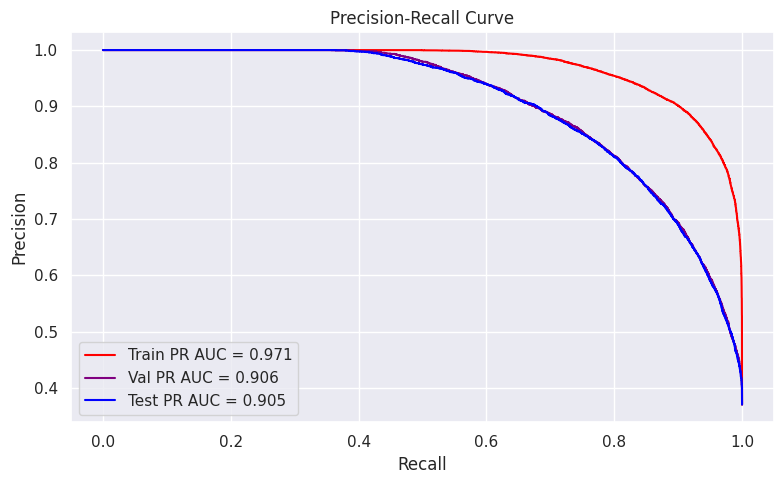

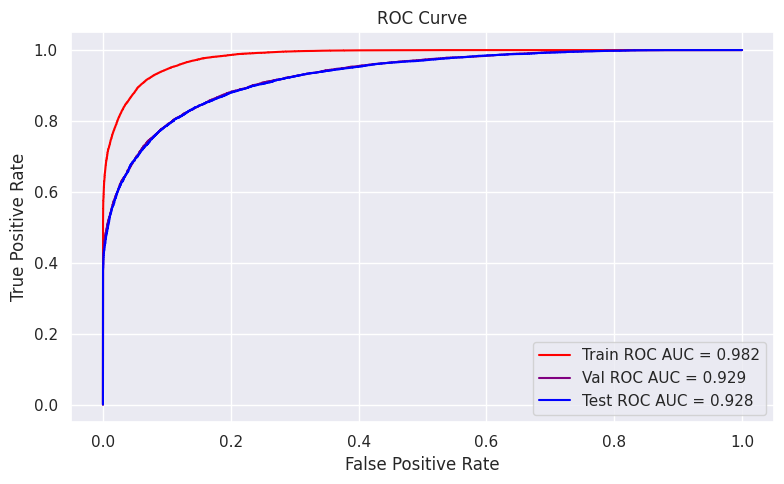

In [17]:
# PR AUC curve (precision-recall/average precision)
plt.figure(figsize=(8, 5))
plt.plot(recall_train, precision_train, color='red', label=f"Train PR AUC = {pr_auc_train:.3f}")
plt.plot(recall_val, precision_val, color='purple', label=f"Val PR AUC = {pr_auc_val:.3f}")
plt.plot(recall_test, precision_test, color='blue', label=f"Test PR AUC = {pr_auc_test:.3f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.tight_layout()
plt.show()

# ROC AUC curve
plt.figure(figsize=(8, 5))
plt.plot(fpr_train, tpr_train, color='red', label=f"Train ROC AUC = {roc_auc_train:.3f}")
plt.plot(fpr_val, tpr_val, color='purple', label=f"Val ROC AUC = {roc_auc_val:.3f}")
plt.plot(fpr_test, tpr_test, color='blue', label=f"Test ROC AUC = {roc_auc_test:.3f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.tight_layout()
plt.show()